14 0
15 0
33 1
34 1
45 2
46 2
58 3
59 3
67 4
68 4
77 5
78 5
90 6
101 7
112 8
113 8
122 9
123 9
131 10
132 10
133 10
144 11
145 11
146 11
157 12
158 12
159 12
171 13
172 13
173 13
184 14
185 14


<ipython-input-16-cf7dc5665b26>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][i] += 1
<ipython-input-16-cf7dc5665b26>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][j + 1] -= 1
<ipython-input-16-cf7dc5665b26>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][j + 2] -= 1


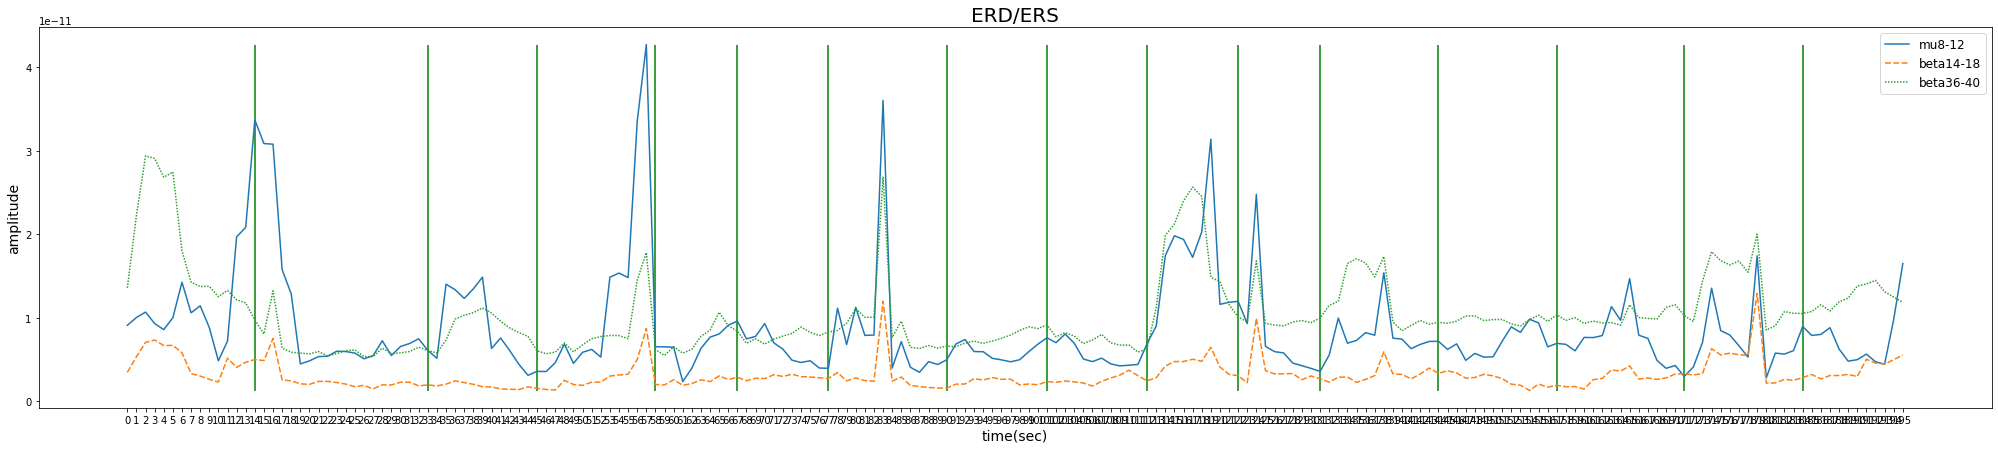

In [16]:
## 주석 부분은 범위 바꿔주고 싶을 때 바꾸면 되는 부분.

# Fp1_FFT 파일 불러오기
import pandas as pd
from datetime import datetime

df = pd.read_table('C:/MAVE_RawData/2022-06-11_오후 2_37/Fp1_FFT.txt', sep='\t',
                   encoding='cp949',float_precision='high')

df['mu8-12'] = 0
df['beta14-18'] = 0
df['beta36-40'] = 0
for i in range(1, len(df.columns) - 3):  # 마지막 컬럼 세개가 mu, beta,beta 여서 그거 제외한거
    if float(df.columns[i][:-2]) >= 8 and float(df.columns[i][:-2]) < 12:
        df['mu8-12'] += df[df.columns[i]]
    elif float(df.columns[i][:-2]) >= 14 and float(df.columns[i][:-2]) < 18:
        df['beta14-18'] += df[df.columns[i]]
    elif float(df.columns[i][:-2]) >= 18 and float(df.columns[i][:-2]) < 22:
        df['beta36-40'] += df[df.columns[i]]
    elif float(df.columns[i][:-2]) >= 22 and float(df.columns[i][:-2]) < 26:
        df['beta36-40'] += df[df.columns[i]]
    elif float(df.columns[i][:-2]) >= 30 and float(df.columns[i][:-2]) < 34:
        df['beta36-40'] += df[df.columns[i]]
    elif float(df.columns[i][:-2]) >= 38 and float(df.columns[i][:-2]) < 42:
        df['beta36-40'] += df[df.columns[i]]
    elif float(df.columns[i][:-2]) >= 42 and float(df.columns[i][:-2]) < 46:
        df['beta36-40'] += df[df.columns[i]]
    
    

# ClickTime 파일 불러와서 배열에 저장.
# click time 시간포맷 변경해서 리스트에 넣기 오후 ㅁ:ㅁㅁ:ㅁㅁ
f = open("C:/MAVE_RawData/2022-06-11_오후 2_37/ct.txt", "r")
click_time = []
while True:
    line = f.readline().strip()
    if not line: break
    click_time.append(line)

click_time_reformat = []
for i in range(len(click_time)):
    times = datetime.strptime(click_time[i][:-7], "%Y-%m-%d %H:%M:%S")
    if int(times.strftime("%H")) > 12:
        h = int(times.strftime("%H")) - 12
        time_new = times.strftime("오후 " + str(h) + ":%M:%S")
        click_time_reformat.append(time_new)
    else:
        time_new = times.strftime("오전 %H:%M:%S")
        click_time_reformat.append(time_new)

# click에 시간차 0초 1초 인걸로 클릭 타이밍 1로 만들어주기.
df['click'] = 0
df['Time']
for i in range(0, len(df)):  # 뇌파기기에서 찍힌 시간
    df['Time'][i].split('.')
    time_1 = datetime.strptime(df['Time'][i].split('.')[0][3:], "%H:%M:%S")  # 10이랑 11 조정해줘야함.
    for j in range(0, len(click_time)):  # 클릭버튼 눌러서 찍힌 시간
        time_2 = datetime.strptime(click_time_reformat[j][3:], "%H:%M:%S")
        time_interval = time_2 - time_1
        if str(time_interval) == '0:00:00' or str(time_interval) == '0:00:01':
            print(i, j)
            df['click'][i] += 1
            break

# 중복된 click time 제거해주기 (3개까지 동시에 나오는 경우가 있어서 그거 제거 해줌)
for j in range(0, len(df)):
    if df['click'][j] == 1:
        if df['click'][j + 1] == 1:
            df['click'][j + 1] -= 1
            if df['click'][j + 2] == 1:
                df['click'][j + 2] -= 1

# 그래프 그리기
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(35, 7))

# Line graph by seaborn
ax = sns.lineplot(data=df[df.columns[-4:-1]])
# ax = sns.lineplot(data=df[df.columns[-4:-1]][50:])
plt.title('ERD/ERS', fontsize=20)
plt.ylabel('amplitude', fontsize=14)

plt.xlabel('time(sec)', fontsize=14)
plt.xticks([i for i in range(0, len(df), 1)])
# plt.xticks([i for i in range(50, len(df), 1)])
plt.legend(fontsize=12, loc='best')

# 세로 녹색 선 : 클릭 시점 표시해주기.
for i in range(len(df)):
    # for i in range(50,len(df)) :
    if df['click'][i] == 1:
        min_ = [min(df['mu8-12']), min(df['beta14-18']), min(df['beta36-40'])]
        max_ = [max(df['mu8-12']), max(df['beta14-18']), max(df['beta36-40'])]
        #         min_ = [min(df['mu8-12'][50:]),min(df['beta14-18'][50:]),min(df['beta36-40'][50:])]
        #         max_ = [max(df['mu8-12'][50:]),max(df['beta14-18'][50:]),max(df['beta36-40'][50:])]
        plt.vlines(i, min(min_), max(max_), color="green")
        
plt.show()

In [18]:
print(df)
sum1 = df.sum(axis =1)


print(sum1)

                Time        0.00Hz        0.20Hz        0.40Hz        0.60Hz  \
0    오후 2:37:16.493   0.000000e+00  0.000000e+00  2.000000e-16  7.000000e-16   
1    오후 2:37:17.636   2.000000e-15  4.000000e-15  4.000000e-15  4.100000e-15   
2    오후 2:37:18.601   3.700000e-15  7.600000e-15  7.700000e-15  8.000000e-15   
3    오후 2:37:19.274   2.500000e-15  5.100000e-15  5.300000e-15  5.700000e-15   
4    오후 2:37:20.372   7.000000e-16  1.500000e-15  1.600000e-15  1.700000e-15   
..               ...           ...           ...           ...           ...   
191  오후 2:40:28.172   2.000000e-16  4.000000e-16  4.000000e-16  5.000000e-16   
192  오후 2:40:29.339   0.000000e+00  1.000000e-16  1.000000e-16  1.000000e-16   
193  오후 2:40:30.780   8.000000e-16  1.700000e-15  1.800000e-15  1.900000e-15   
194  오후 2:40:32.286   2.530000e-14  5.300000e-14  6.020000e-14  7.320000e-14   
195  오후 2:40:33.205   2.910000e-14  6.030000e-14  6.670000e-14  7.820000e-14   

           0.80Hz        1.00Hz        